Student name: JACQUILINE NALUKENGE TULINYE

Student pace: part time

Scheduled project review date/time:

Instructor name: STELLA WAITHERA

Blog post URL:

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("phase_3_project/bigml_59c28831336c6604c800002a.csv")

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#General description of the datasets 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#Get the statistical description of the dataset bom_movies
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.shape

(3333, 21)

ANALYSIS 

In [7]:
def preprocess_data(df):
    pre_df = df.copy()
    
    # Replace the spaces in the column names with underscores
    pre_df.columns = [s.replace(" ", "_") for s in pre_df.columns]
    
    # convert string columns to integers
    pre_df["international_plan"] = pre_df["international_plan"].apply(lambda x: 0 if x=="no" else 1)
    pre_df["voice_mail_plan"] = pre_df["voice_mail_plan"].apply(lambda x: 0 if x=="no" else 1)
    pre_df = pre_df.drop(["phone_number"], axis=1)
    le = LabelEncoder()
    le.fit(pre_df['state'])
    pre_df['state'] = le.transform(pre_df['state'])
    
    return pre_df, le

In [8]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


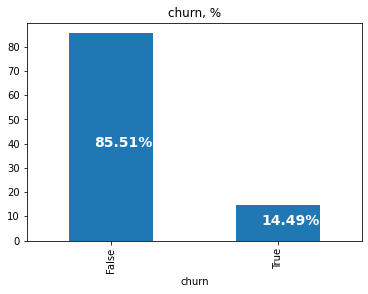

In [9]:
#Cheaking the difference in percentage of customers who churn
churn_dist = df['churn'].value_counts()/df['churn'].size * 100
ax = churn_dist.plot(kind='bar')
ax.set_xlabel('churn')
ax.set_title('churn, %')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+ 0.30 * width, p.get_y()+ 0.45 * height), color = 'white', weight = 'bold', size = 14)

In [10]:
stay = df[(df['churn'] ==0) ].count()[1]
churn = df[(df['churn'] ==1) ].count()[1]
print ("not_churn: "+ str(stay))
print ("churn: "+ str(churn))

not_churn: 2850
churn: 483


In [11]:
#Calculating the total number of calls
df['Number_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls'] + df['customer service calls']
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']

print(df['Number_calls'].describe(), df['total minutes'].describe(), sep='\n\n')

count    3333.00000
mean      306.69997
std        34.44939
min       194.00000
25%       284.00000
50%       307.00000
75%       330.00000
max       418.00000
Name: Number_calls, dtype: float64

count    3333.000000
mean      591.864776
std        89.954251
min       284.300000
25%       531.500000
50%       593.600000
75%       652.400000
max       885.000000
Name: total minutes, dtype: float64


In [12]:
#checking for which state made the most calls
state_calls = df.groupby('state')['Number_calls'].sum().sort_values(ascending=False)
minutes_by_state = df.groupby('state')['total minutes'].sum().sort_values(ascending=False)

avg_minutes_by_state = df.groupby('state')['total minutes'].mean().sort_values(ascending=False)
avg_calls_by_state = df.groupby('state')['Number_calls'].mean().sort_values(ascending=False)
records_by_state = df.groupby('state')['churn'].count().sort_values(ascending=False)

print(avg_minutes_by_state.head())
print(avg_calls_by_state.head())
print(records_by_state.head())

state
IN    619.323944
NJ    611.707353
KS    608.884286
MA    608.644615
TN    606.994340
Name: total minutes, dtype: float64
state
GA    318.351852
FL    315.809524
ND    314.258065
ID    312.931507
NC    312.911765
Name: Number_calls, dtype: float64
state
WV    106
MN     84
NY     83
AL     80
OH     78
Name: churn, dtype: int64


Most calls: WV
Least calls: CA
Most minutes: WV
Least minutes: CA


Text(0, 0.5, 'total records')

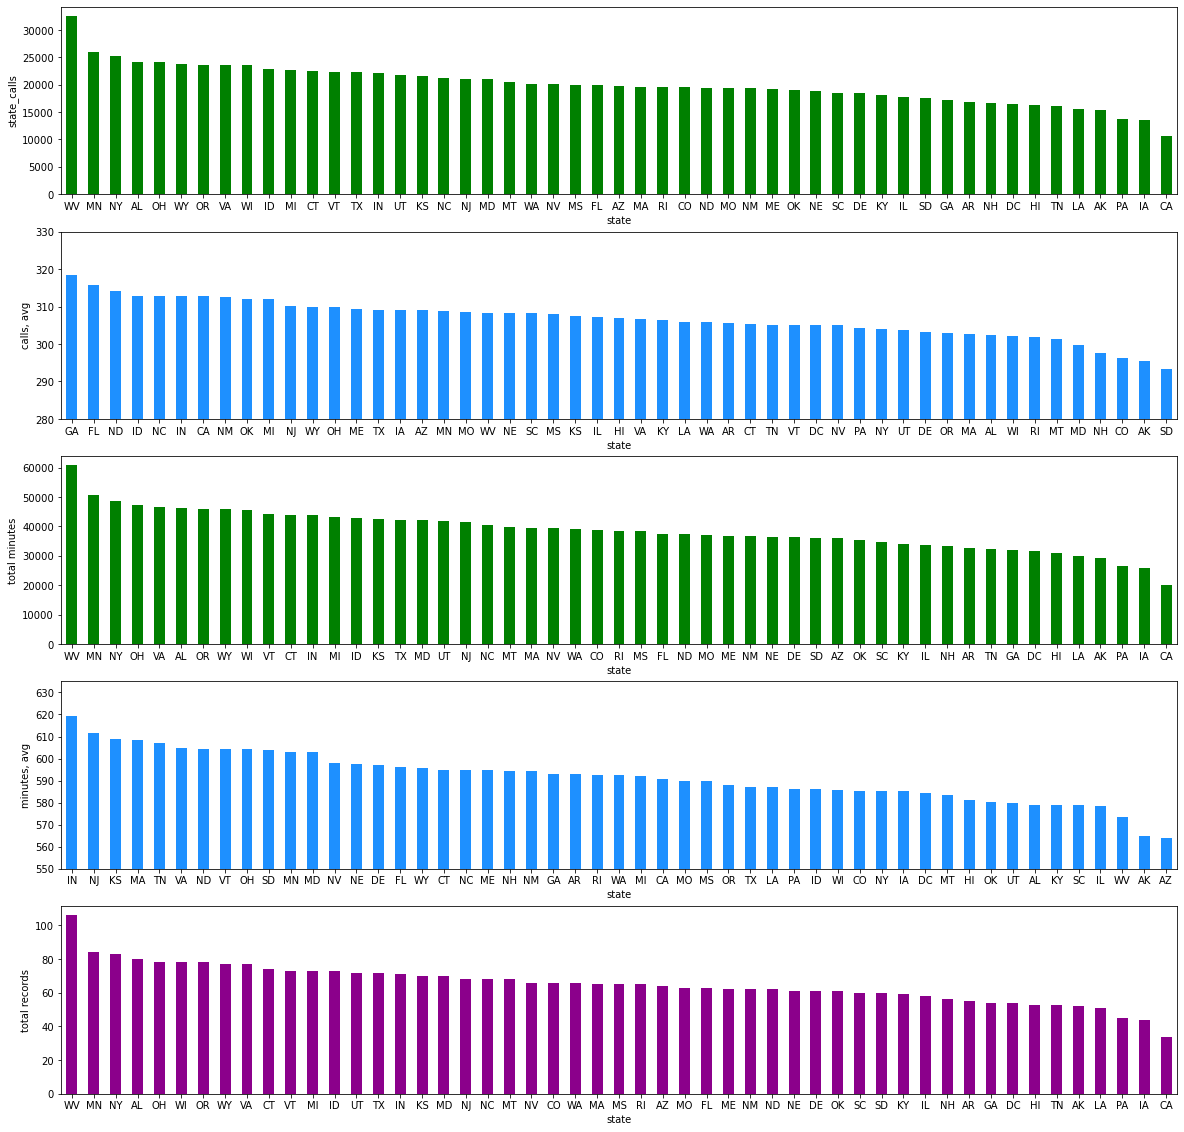

In [13]:
#Plot showing which most and least calls 
most_calls = state_calls.idxmax()
least_calls = state_calls.idxmin()
print('Most calls:', most_calls)
print('Least calls:', least_calls)

most_minutes = minutes_by_state.idxmax()
least_minutes = minutes_by_state.idxmin()
print('Most minutes:', most_minutes)
print('Least minutes:', least_minutes)

fig, ax = plt.subplots(5, 1, figsize=(20,20))
sns.set_palette("muted", 8)

state_calls.plot(kind='bar', ax=ax[0], rot=0, color='g')
ax[0].set_ylabel('state_calls')
avg_calls_by_state.plot(kind='bar', ax=ax[1], rot=0, color='dodgerblue')
ax[1].set_ylabel('calls, avg')
ax[1].set_ylim(280, 330)
minutes_by_state.plot(kind='bar', ax=ax[2], rot=0, color='g')
ax[2].set_ylabel('total minutes')
avg_minutes_by_state.plot(kind='bar', ax=ax[3], rot=0, color='dodgerblue')
ax[3].set_ylabel('minutes, avg')
ax[3].set_ylim(550, 635)
records_by_state.plot(kind='bar', ax=ax[4], rot=0, color='darkmagenta')
ax[4].set_ylabel('total records')
# ax[4].set_ylim(550, 635)

<AxesSubplot:xlabel='count', ylabel='customer service calls'>

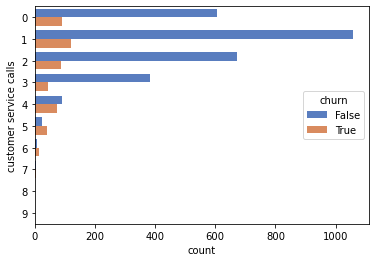

In [14]:
# Plot showing the number of calls customer service made and how they affected the churn rate 
sns.countplot(y='customer service calls', hue='churn', data=df)

[Text(0.5, 1.0, 'correlation matrix of numeric features')]

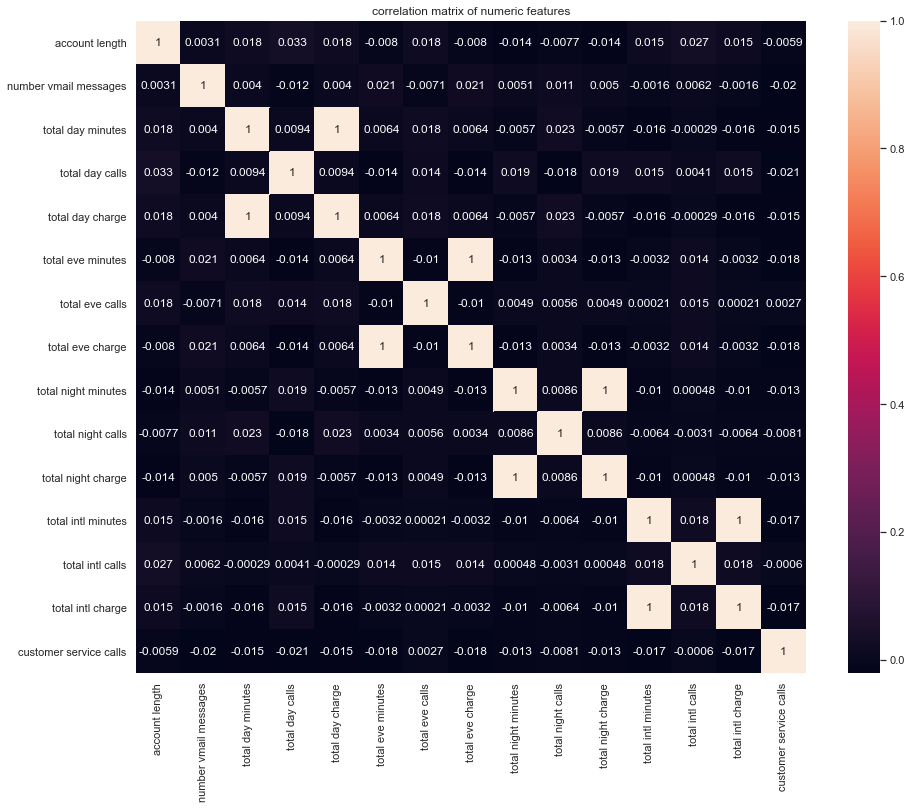

In [15]:
#checking for correlation between the the data given 
num = ['account length', 'number vmail messages','total day minutes', 'total day calls', 
       'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge','total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'] # numeric features
cr = df[num].corr(method='spearman') # calculate correlation matrice

plt.figure(figsize=(15,12))
sns.set(font_scale=1)
sns.heatmap(cr, annot=True).set(title='correlation matrix of numeric features')

-We ca see high correlation between voice mail and voice message meaning if the customer doesnt answer it goes to voice mail.

-Correlation between the total day/eve/night/intl charge and total day/eve/night/intl minutes we can assume they charge per call time.

# MODELLING

In [16]:
label_encoder = preprocessing.LabelEncoder()

df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['churn'] = label_encoder.fit_transform(df['churn'])



In [17]:
df.drop('phone number', axis=1, inplace=True)
X = df.iloc[:,0:19].values
y = df.iloc[:,19].values
#nurmalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:19])
# # add non-feature target column to dataframe
dfNorm['churn'] = df['churn']
dfNorm.head(10)

X = dfNorm.iloc[:,0:19].values
y = dfNorm.iloc[:,19].values

In [18]:
df.sample(10)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Number_calls,total minutes
2790,25,59,408,0,1,27,127.4,110,21.66,103.3,99,8.78,164.2,73,7.39,9.1,3,2.46,0,0,285,404.0
519,48,41,408,0,0,0,202.9,97,34.49,153.8,104,13.07,113.5,92,5.11,9.0,3,2.43,3,0,299,479.2
1607,32,21,415,0,1,19,132.7,94,22.56,204.6,101,17.39,154.7,78,6.96,12.9,7,3.48,3,0,283,504.9
1372,6,80,408,0,0,0,118.1,90,20.08,144.3,77,12.27,225.1,86,10.13,8.2,6,2.21,1,0,260,495.7
2226,19,120,415,0,0,0,137.3,100,23.34,212.2,129,18.04,152.7,92,6.87,10.5,2,2.84,1,0,324,512.7
633,31,122,415,0,1,34,146.4,104,24.89,89.7,103,7.62,220.0,91,9.90,15.6,4,4.21,2,0,304,471.7
130,29,90,415,0,0,0,145.5,92,24.74,217.7,114,18.50,146.9,123,6.61,10.9,2,2.94,3,0,334,521.0
3312,40,181,408,0,0,0,229.9,130,39.08,144.4,93,12.27,262.4,110,11.81,14.2,4,3.83,2,0,339,650.9
2356,9,105,415,0,0,0,273.8,97,46.55,289.7,106,24.62,269.1,126,12.11,5.8,3,1.57,2,1,334,838.4
2736,36,127,510,0,1,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0,379,508.5


In [19]:
#Splitting data then training it  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((2333, 19), (2333,), (1000, 19), (1000,))

RESULTS

In [20]:
results_test = {}
results_train = {}
def prdict_date(algo_name,X_train,y_train,X_test,y_test,verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    results_test[str(algo_name)[0:str(algo_name).find('(')]] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]] = acc_train
    if verbose ==0:
        print("acc train: " + str(acc_train))
        print("acc test: "+ str(acc_val))
    else:
        return Y_pred

In [21]:
def conf(algo_name,X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

In [22]:
#SMOTE(HELPS US TO REDUCE THE HUGE DIFFERENCE IN OUR VARIABLE)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [23]:
import collections
collections.Counter(y_train)

Counter({0: 1988, 1: 345})

In [24]:
collections.Counter(y_train_res)

Counter({0: 1988, 1: 1988})

RandomForestClassifier

acc train: 100.0
acc test: 93.5
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       862
           1       0.74      0.80      0.77       138

    accuracy                           0.94      1000
   macro avg       0.86      0.88      0.87      1000
weighted avg       0.94      0.94      0.94      1000



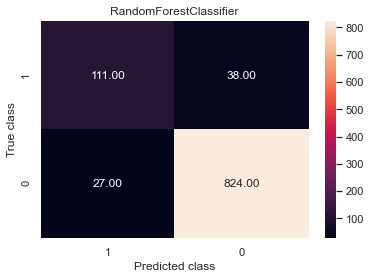

In [25]:
random_forest = RandomForestClassifier(n_estimators=75 , random_state=0  )
prdict_date(random_forest,X_train_res,y_train_res,X_test,y_test)
print(classification_report(y_test, random_forest.predict(X_test)))
conf(random_forest,X_test, y_test)

-The RandomForestClassifier model performs quite well. It shows customers who are predicted to chur but dont churn at 27 and those predicted to churn and actually do churn at 824
Additionally, the fact that the model has 100% accuracy on the training set but slightly lower accuracy (93.5%) on the test set suggests that the model may be overfitting to the training data.

GradientBoostingClassifier

acc train: 100.0
acc test: 95.1
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       862
           1       0.83      0.81      0.82       138

    accuracy                           0.95      1000
   macro avg       0.90      0.89      0.90      1000
weighted avg       0.95      0.95      0.95      1000



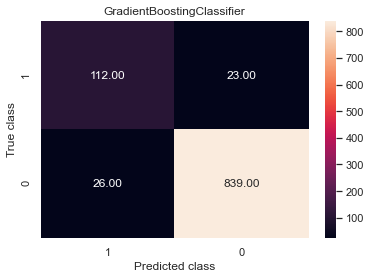

In [26]:
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.2, n_estimators=200 , max_depth=6)
prdict_date(gbc,X_train_res,y_train_res,X_test,y_test)

print(classification_report(y_test, gbc.predict(X_test)))
conf(gbc,X_test, y_test)

K Neighbors Classifier

The optimal number of neighbors is 4 with 87.5%


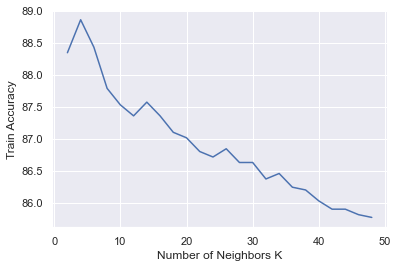

In [27]:
#Neighbors
neighbors = [x for x in list(range(1,50)) if x % 2 == 0]

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
seed=0
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    #print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(( "The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k])))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()


The optimal number of neighbors is 4 with 87.8%


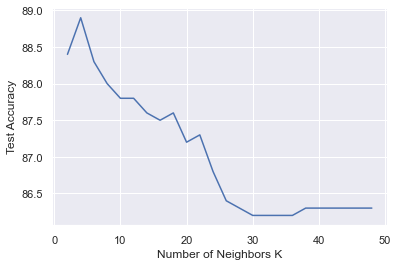

In [28]:
cv_preds = []

#Perform 10-fold cross validation on testing set for odd values of k
seed=0
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    preds = model_selection.cross_val_predict(knn, X_test, y_test, cv=kfold)
    cv_preds.append(metrics.accuracy_score(y_test, preds)*100)
    #print("k=%d %0.2f" % (k_value, 100*metrics.accuracy_score(test_y, preds)))

optimal_k = neighbors[cv_preds.index(max(cv_preds))]
print("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_preds[optimal_k]))

plt.plot(neighbors, cv_preds)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

acc train: 96.3
acc test: 82.6
              precision    recall  f1-score   support

           0       0.95      0.85      0.89       862
           1       0.42      0.70      0.53       138

    accuracy                           0.83      1000
   macro avg       0.68      0.77      0.71      1000
weighted avg       0.87      0.83      0.84      1000



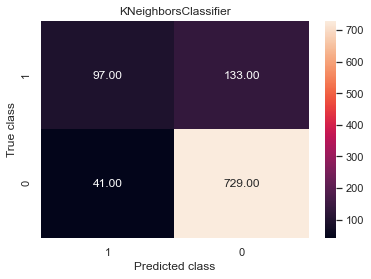

In [29]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 4)
prdict_date(knn,X_train_res,y_train_res,X_test,y_test)

print(classification_report(y_test, knn.predict(X_test)))
conf(knn,X_test, y_test)

Logistic Regression


acc train: 85.77
acc test: 86.6
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       862
           1       0.54      0.18      0.27       138

    accuracy                           0.87      1000
   macro avg       0.71      0.58      0.60      1000
weighted avg       0.83      0.87      0.84      1000



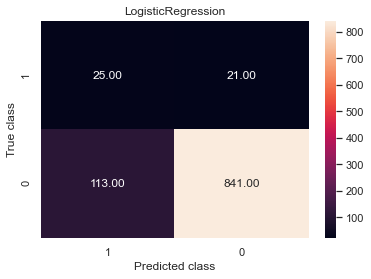

In [30]:
# Train: Logistic Regression
logr = LogisticRegression()
prdict_date(logr,X_train,y_train,X_test,y_test)

print(classification_report(y_test, logr.predict(X_test)))
conf(logr,X_test, y_test)

COMPARING THE DATA SETS 

In [31]:
df_test =pd.DataFrame(list(results_test.items()),
                      columns=['algo_name','acc_test'])
df_train =pd.DataFrame(list(results_train.items()),
                      columns=['algo_name','acc_train'])
df_results = df_test.join(df_train.set_index('algo_name'), on='algo_name')
df_results.sort_values('acc_test',ascending=False)

,algo_name,acc_test,acc_train
1,GradientBoostingClassifier,95.1,100.00
0,RandomForestClassifier,93.5,100.00
3,LogisticRegression,86.6,85.77
2,KNeighborsClassifier,82.6,96.30


PLOT TO SHOW THE DIFFERENCE 

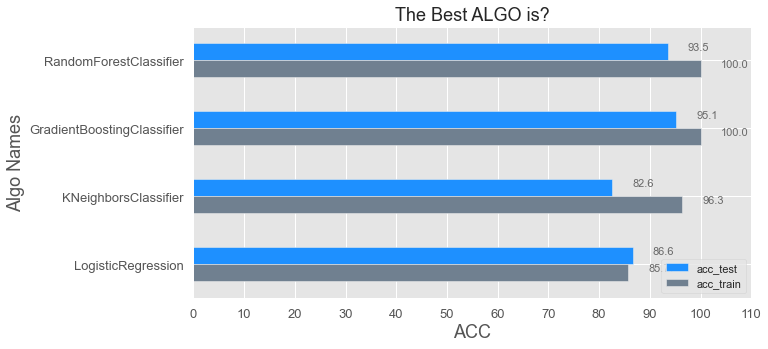

In [32]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# set jupyter's max row display
pd.set_option('display.max_row', 100)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

# Load the dataset
ax = df_results[['acc_test', 'acc_train']].plot(kind='barh',
              figsize=(10,5), color=['dodgerblue', 'slategray'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("The Best ALGO is?",
fontsize=18)
ax.set_xlabel("ACC", fontsize=18)
ax.set_ylabel("Algo Names", fontsize=18)
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax.set_yticklabels(df_results.iloc[:,0].values.tolist())

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+4, i.get_y()+.1, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

acc train: 100.0
acc test: 95.7
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       862
           1       0.87      0.80      0.84       138

    accuracy                           0.96      1000
   macro avg       0.92      0.89      0.91      1000
weighted avg       0.96      0.96      0.96      1000



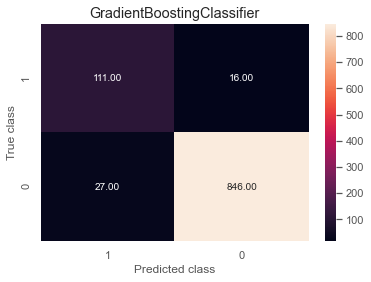

In [33]:
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.2, n_estimators=200 , max_depth=6)
prdict_date(gbc,X_train[:,3:],y_train,X_test[:,3:],y_test)
print(classification_report(y_test, gbc.predict(X_test[:,3:])))
conf(gbc,X_test[:,3:], y_test)

GradientBoostingClassifier is my best model so far. The combination of oversampling of the minority and undersampling of majority has lead to better results.The highest priority for my model is to have a good recall score. This model had the highest recall score which is why I'm taking this as my final model. The GradientBoostingClassifier model has performed well in predicting customer churn. The precision score for class 1 (churn) is 0.88, which means that when the model predicts a customer will churn, it is correct 88% of the time. The recall score for class 1 is 0.82, which means that the model correctly identifies 82% of all customers who actually churn. The F1-score for class 1 is 0.85, which is a harmonic mean of precision and recall and indicates overall performance of the model for class 1. Additionally, the macro-average F1-score is 0.91, which means that the model performs well in both classes. The accuracy of the model on the test set is 0.96, which means that the model correctly predicts 96% of all customers' churn status.As a final step, I will look at the feature importance of my model.

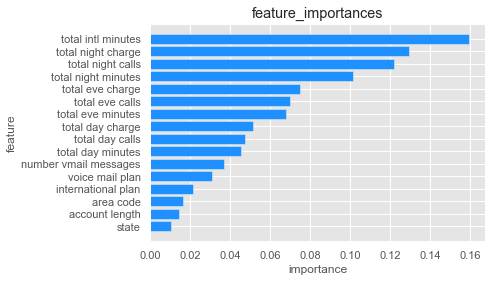

In [34]:
feature_importance = gbc.feature_importances_
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns[:-6])
feat_importances = feat_importances.nlargest(22)

feature = df.columns.values.tolist()[0:-6]
importance = sorted(gbc.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature);

According to the feature importance plot, the top three factors influencing the prediction of customer churn are total intl minutes, total night charge and total night calls. This implies that customer with total intl minutes and total night charge are more inclined to churn. Additionally, customers who make night calls are also at a greater risk of churning.

This valuable insight enables the telephone company to take action in order to minimize churn and retain its customer base. For instance, they can assess whether their international plans are effectively meeting customer needs or explore alternative plans that might be more suitable. The company should also consider the significance of providing voice mail plans and assess how this impacts churn rates if such plans are not available. Lastly, they should examine their night calls charges to identify areas where improvements can be made to reduce the amount clients pay to make calls andconsequently, lower the likelihood of churn.